In [1]:
from sklearn.datasets import load_boston

boston = load_boston()

print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [2]:
features, labels = boston.data, boston.target

In [3]:
print("Examples number:", features.shape[0])
print("Features number:", features.shape[1])

Examples number: 506
Features number: 13


**Find the number of main influence features:**

In [39]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()
forest.fit(features, labels)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]

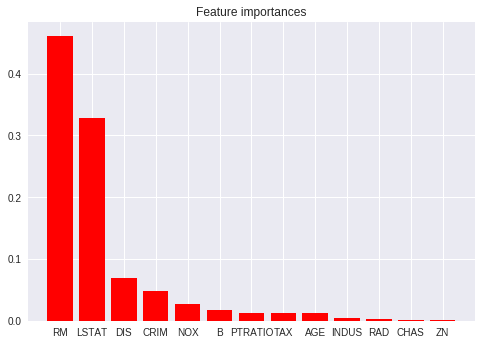

In [42]:
plt.title("Feature importances")
plt.bar(range(features.shape[1]), importances[indices],
       color="r", align="center")
plt.xticks(range(features.shape[1]), boston.feature_names[indices])
plt.xlim([-1, features.shape[1]])
plt.show()

From this plot we can choose features, which have the greatest impact to prediction. Let's choose first 5 features.

Let's observe relations between features and the target.  
**To reduce graph size we will plot relationships in dataset between 5 main features and the target:**

In [65]:
import seaborn as sbn
import pandas as pd
import numpy as np

col_names = boston.feature_names.tolist() + ['target']
df = pd.DataFrame(data=np.c_[features, labels], 
                  columns=col_names)

top_indices = indices[0:5]

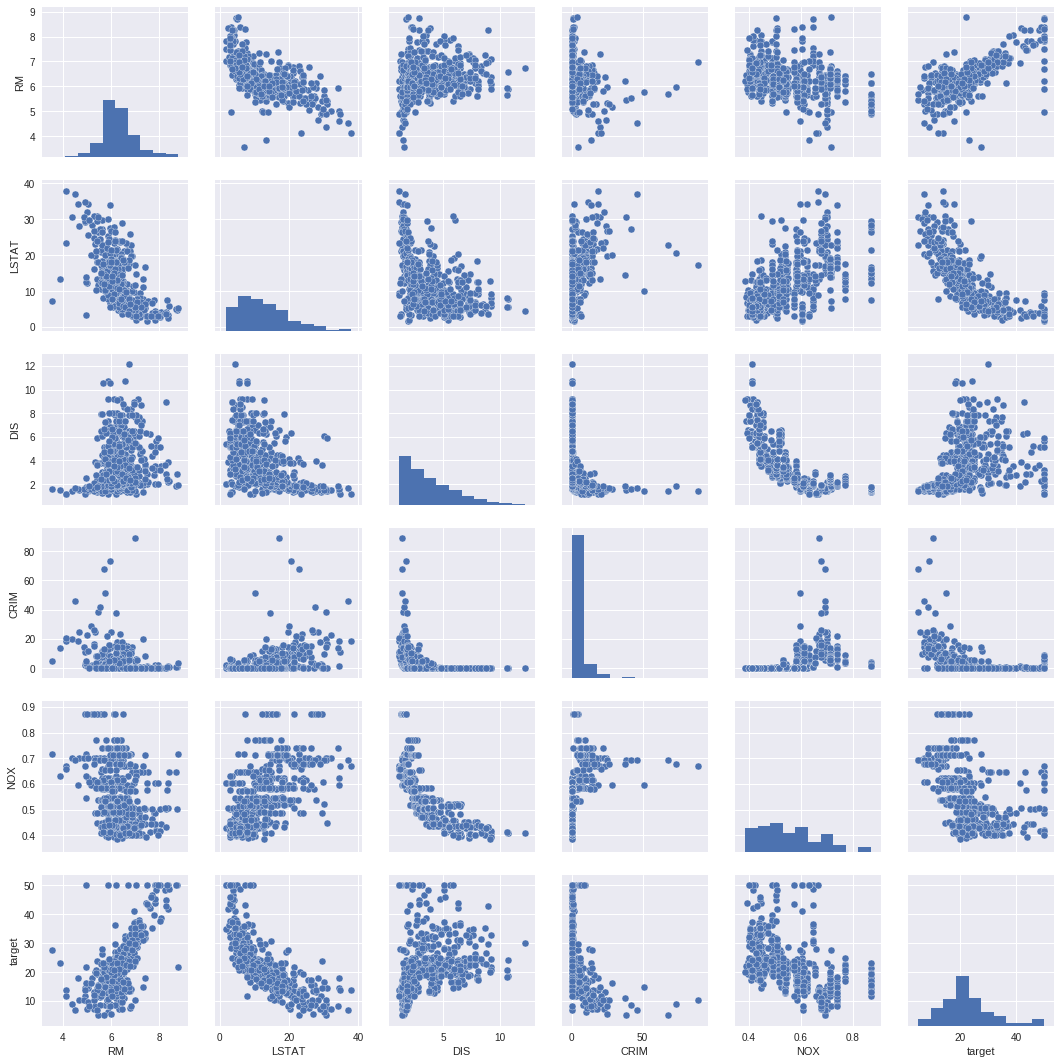

In [70]:
sbn.pairplot(df[boston.feature_names[top_indices].tolist() + ['target']])
sbn.plt.show()

**Split the data:**

In [15]:
import sklearn.model_selection as ms

In [16]:
train_features, dev_test_features, train_labels, dev_test_labels = \
  ms.train_test_split(features, labels, train_size=0.8, random_state=228)
    
print("Train features examples number:", train_features.shape[0])
print("Train labels examples number:", train_labels.shape[0])

Train features examples number: 404
Train labels examples number: 404


In [17]:
dev_features, test_features, dev_labels, test_labels = \
  ms.train_test_split(dev_test_features, dev_test_labels, train_size=0.5, random_state=228)

print("Development features examples number:", dev_features.shape[0])
print("Development labels examples number:", dev_labels.shape[0])

Development features examples number: 51
Development labels examples number: 51


In this project we will predict houses prices, that's why **it's a regression task**

**Fit and test a model function:**

In [18]:
import sklearn.metrics

def fit_and_test(model, train_features, train_labels):
    model.fit(train_features, train_labels)
    print("Coefficient of determination on the training set: %0.3f"\
      % model.score(train_features, train_labels))

    cv = ms.KFold(3, shuffle=True, random_state=228)
    scores = ms.cross_val_score(model, train_features, train_labels, cv=cv)
    print("Avg coefficient of determination using crossvalidation: %0.3f" % scores.mean())

**The function for predicting values on a test set and measuring the perfomance:**

In [19]:
def predict_and_evaluate(model, test_features, test_labels):
    predicted_test_labels = model.predict(test_features)
    
    cv = ms.KFold(3, shuffle=True, random_state=228)
    scores = ms.cross_val_score(model, test_features, test_labels, cv=cv)
    print("Avg coefficient of determination using crossvalidation: %0.3f" % scores.mean())
    
    print("Explained variance score: %0.3f" %
      sklearn.metrics.explained_variance_score(test_labels, 
                                               predicted_test_labels))
    print("Mean squared error:       %0.3f" %
      sklearn.metrics.mean_squared_error(test_labels, 
                                         predicted_test_labels))
    print("R2 score:                 %0.3f" %
      sklearn.metrics.r2_score(test_labels, 
                               predicted_test_labels))
   
    plot_predicted_measured(test_labels, predicted_test_labels)

**Graphical perfomance evaluation:**

In [20]:
def plot_predicted_measured(test_labels, predicted_test_labels):
    fig, ax = plt.subplots()
    ax.scatter(test_labels, predicted_test_labels)
    ax.plot([test_labels.min(), test_labels.max()], 
            [predicted_test_labels.min(), predicted_test_labels.max()], 
            'k--', lw=4)
    ax.set_xlabel('Measured')
    ax.set_ylabel('Predicted')
    plt.show()

**Create a model (dumb baseline):**

In [21]:
from sklearn import linear_model

lr_model = linear_model.LinearRegression()
fit_and_test(lr_model, train_features, train_labels)

Coefficient of determination on the training set: 0.754
Avg coefficient of determination using crossvalidation: 0.725


Avg coefficient of determination using crossvalidation: 0.168
Explained variance score: 0.697
Mean squared error:       40.889
R2 score:                 0.692


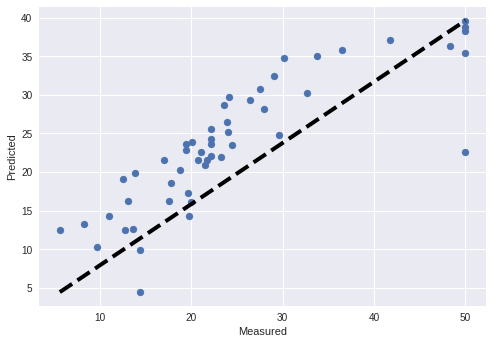

In [22]:
predict_and_evaluate(lr_model, dev_features, dev_labels)

**Create an XGBOOST model:**

In [23]:
#Find hyperparameters
#Conclusion

#FIX OUTPUT HIST

In [24]:
import xgboost

xgb_model = xgboost.XGBRegressor()
fit_and_test(xgb_model, train_features, train_labels)

Coefficient of determination on the training set: 0.970
Avg coefficient of determination using crossvalidation: 0.831


Avg coefficient of determination using crossvalidation: 0.710
Explained variance score: 0.925
Mean squared error:       10.552
R2 score:                 0.921


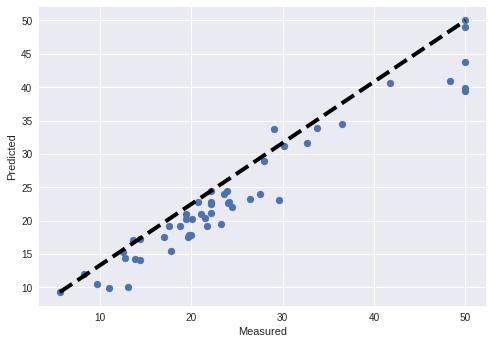

In [25]:
predict_and_evaluate(xgb_model, dev_features, dev_labels)

Here you can see that the XGBregressor model gives us better results in comparison with the baseline.  
But still it's fitted not good.  

**Let's find appropriate hyperparameters for XGBoost model:**

In [ ]:
#CHANGE hyperpar and test on dev few times.

In [ ]:
#Test on a testing set